In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import os

In [ ]:
base_path = r"/content/drive/MyDrive/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(os.path.join(base_path, 'kz.csv'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [ ]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

A large number of passes in user IDs. It was decided to remove the omissions

In [ ]:
df = df.dropna().drop_duplicates()

In [ ]:
# Convert date columns to datetime
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S UTC')

In [ ]:
# Extract only the date in the format "%Y-%m-%d"
df['event_date'] = df['event_time'].dt.strftime('%Y-%m-%d')

In [ ]:
print(f'Minimum date {min(df.event_date)}, maximum date {max(df.event_date)}')

Minimum date 1970-01-01, maximum date 2020-11-21


In [ ]:
# Assuming 'event_date' is the column containing dates in string format
#df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')
# Update all years to 2020
#df['event_date'] = df['event_date'].apply(lambda x: x.replace(year=2020))
# If you want to convert it back to string format
#data['event_date'] = data['event_date'].dt.strftime('%Y-%m-%d')

In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')
start_date = pd.to_datetime('2020-04-01', format='%Y-%m-%d')
# Select rows within the date range
df = df[df['event_date'] >= start_date]

In [ ]:
print(f'Minimum date {min(df.event_date)}, maximum date {max(df.event_date)}')

Minimum date 2020-04-01 00:00:00, maximum date 2020-11-21 00:00:00


In [ ]:
num_trans = df.groupby('user_id')['product_id'].count()
print('Number of users with more than 5 transactions:',num_trans[num_trans>4].shape[0])
print('Number of transactions for those users:', num_trans[num_trans>5].sum())
print("Number of categories for those transactions:",df[df.user_id.isin(num_trans[num_trans>5].index)].category_code.nunique())
display(df)

Number of users with more than 5 transactions: 16355
Number of transactions for those users: 232352
Number of categories for those transactions: 122


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04-26
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04-26
10,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18,2020-04-26
...,...,...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18,2020-11-21
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-21
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-21
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-21


In [ ]:
# Select users with more than 4 transactions
users_with_more_than_5_transactions = num_trans[num_trans >= 5].index
# Filter the DataFrame based on selected users
df_selected_users = df[df['user_id'].isin(users_with_more_than_5_transactions)]

In [ ]:
num_categories = df_selected_users.groupby('user_id')['category_code'].nunique()
# Select users with more than 2 different categories
users_with_more_than_2_categories = num_categories[num_categories > 2].index
# Filter the DataFrame based on selected users
data = df_selected_users[df_selected_users['user_id'].isin(users_with_more_than_2_categories)]

In [ ]:
data['user_id'].nunique()

13035

This is how we solved the problems with cold start. Next, we will study our dataset in more detail and carry out the transformation of features

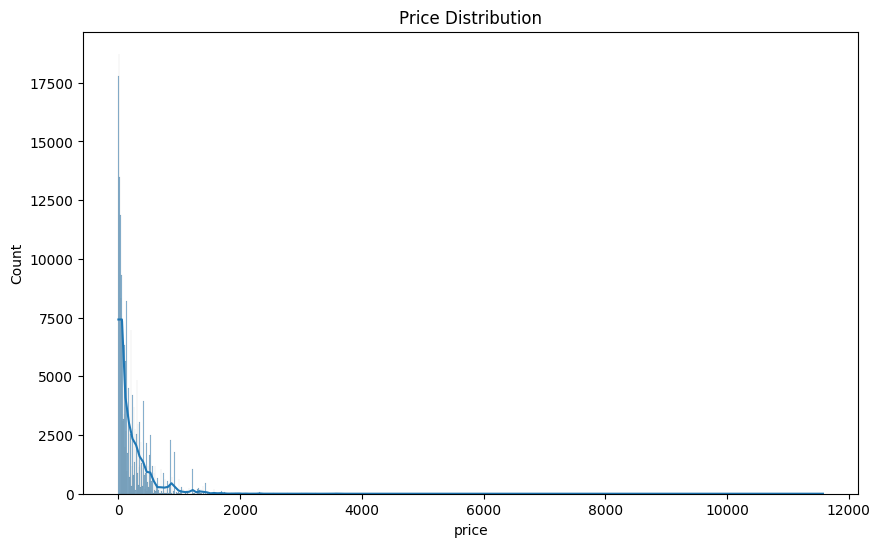

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='price', kde=True)
plt.title("Price Distribution")
plt.show()

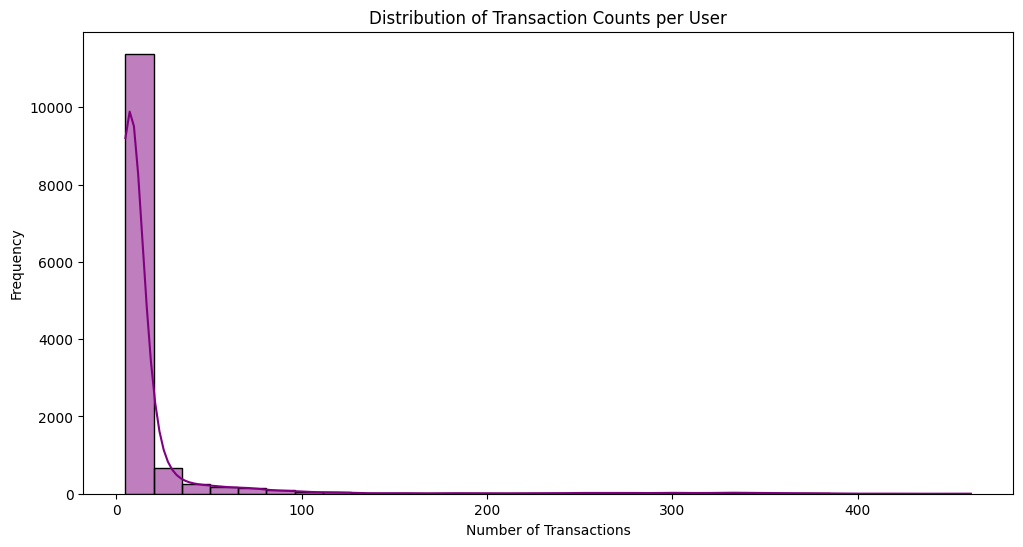

In [ ]:
user_transaction_counts = data.groupby('user_id')['product_id'].count().reset_index(name='transaction_count')

plt.figure(figsize=(12, 6))
sns.histplot(user_transaction_counts['transaction_count'], bins=30, kde=True, color='purple')
plt.title("Distribution of Transaction Counts per User")
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# The number of unique product categories
data['category_code'].nunique()

121

In [ ]:
#most bought categories
most_sold_categories = data.groupby('category_code')['price'].agg('count').reset_index().sort_values('price', ascending=False).head(10)
most_sold_categories.rename(columns={"category_code": "category", "price": "times_sold"}, inplace=True)

In [ ]:
fig = px.bar(
    most_sold_categories,
    x='category',
    y='times_sold',
    title='Most sold categories',
    width=800,
    height=800
)

fig.show()

In [ ]:
# The number of unique product brands
data['brand'].nunique()

508

In [ ]:
#most sold brands
most_sold_brands = data.groupby('brand')['price'].agg('count').reset_index().sort_values('price', ascending=False).head(10)
most_sold_brands.rename(columns={"brand": "brand", "price": "times_sold"}, inplace=True)

In [ ]:
fig = px.bar(
    most_sold_brands,
    x='brand',
    y='times_sold',
    title='Most sold brands',
    width=800,
    height=800
)

fig.show()

We will work with these variables further. This data has a text format, therefore, following the article, we intend to use the embeddings of these characteristics as input data in the model

In [ ]:
# Convert 'event_date' to datetime format
#data['event_date'] = pd.to_datetime(data['event_date'], format='%Y-%m-%d')
# This feature for plot below
data['date_my'] = pd.to_datetime(data['event_date'], format='%Y-%m').dt.strftime('%Y-%m')

# Extract month and day components
data['Year'] = data['event_date'].dt.year
data['Month'] = data['event_date'].dt.month
data['Day'] = data['event_date'].dt.day

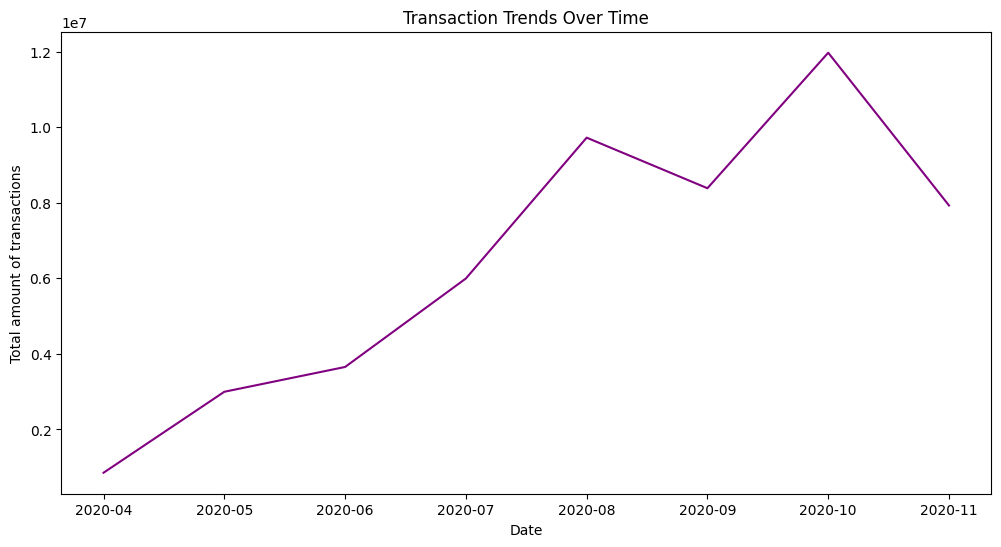

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date_my', y='price', estimator='sum', errorbar=None, color='purple')
plt.title("Transaction Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total amount of transactions")
plt.show()

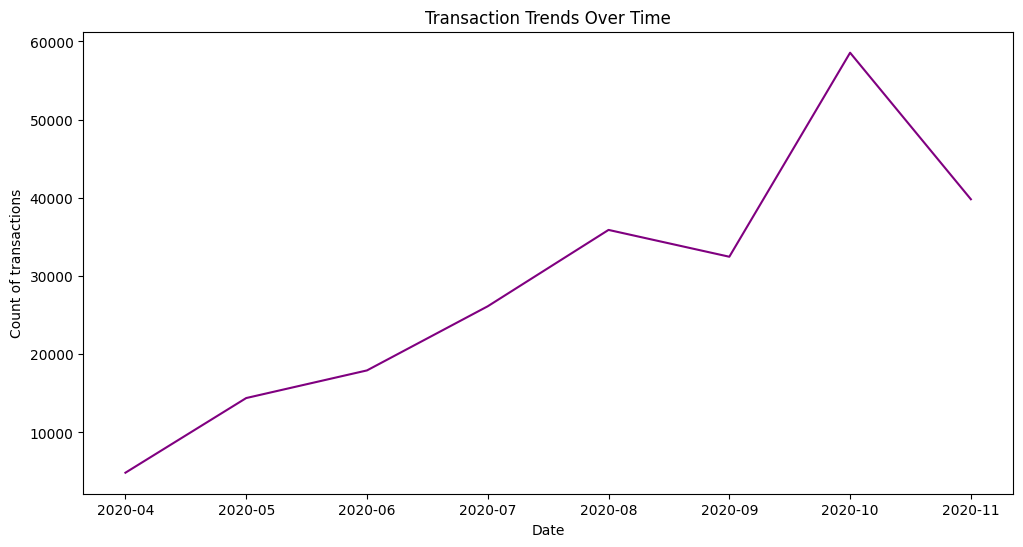

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date_my', y='product_id', estimator='count', errorbar=None, color='purple')
plt.title("Transaction Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count of transactions")
plt.show()

It should be noted that we have data from 1970. However, the graph shows data only for 2020. The fact is that in 2020 there is more data in the dataset than in all previous years.

In [ ]:
# Add a column indicating whether the date is a weekend or not
data['is_weekend'] = (data['event_date'].dt.dayofweek >= 5).astype(int)

In [ ]:
# check
data['is_weekend'].nunique()

2

In [ ]:
# Sort the DataFrame by user_id and event_date
data = data.sort_values(by=['user_id', 'event_date'])
# Calculate the difference in days for each user
data['days_since_previous'] = data.groupby('user_id')['event_date'].diff().dt.days
# Fill NaN values with 0 for the first date of each user
data['days_since_previous'] = data['days_since_previous'].fillna(0).astype(int)

In [ ]:
# Sort the DataFrame by user_id and event_time
data = data.sort_values(by=['user_id', 'event_time'])

# Calculate the difference in hours for each user
data['hours_since_previous'] = data.groupby('user_id')['event_time'].diff().dt.total_seconds() / 3600

# Fill NaN values with 0 for the first date of each user
data['hours_since_previous'] = data['hours_since_previous'].fillna(0)

In [ ]:
data['hours_since_previous'].median()

0.07611111111111112

In [ ]:
data['hours_since_previous'].mean()

102.02730697078836

We performed extensive feature transformation and generated aggregated features on the user’s
overall spending behaviour (e.g., number of transactions, mean/median/total transaction amount) by the time,
the user’s spending behaviour (e.g., number of transactions, mean/median/total transaction amount) within different merchant categories by the time

In [ ]:
# Sort the DataFrame by user_id and event_date
data = data.sort_values(by=['user_id', 'event_date'])
# Calculate the cumulative count of transactions for each user
data['cumulative_transaction_count'] = data.groupby('user_id').cumcount() + 1

In [ ]:
# Calculate the cumulative median of prices for each user
data['cumulative_price_mean'] = data.groupby('user_id')['price'].expanding().mean().reset_index(level=0, drop=True)

In [ ]:
# Calculate the cumulative median of prices for each user
data['cumulative_price_median'] = data.groupby('user_id')['price'].expanding().median().reset_index(level=0, drop=True)

In [ ]:
# Calculate the cumulative sum of prices for each user
data['cumulative_price_sum'] = data.groupby('user_id')['price'].expanding().sum().reset_index(level=0, drop=True)

In [ ]:
# Sort the DataFrame by user_id, category_code, and event_date
data = data.sort_values(by=['user_id', 'category_id', 'event_date'])

# Calculate the cumulative median of prices for each user and category
data['cumulative_price_median_by_category'] = data.groupby(['user_id', 'category_id'])['price'].expanding().median().reset_index(level=[0, 1], drop=True)

In [ ]:
# Calculate the cumulative mean of prices for each user and category
data['cumulative_price_mean_by_category'] = data.groupby(['user_id', 'category_id'])['price'].expanding().mean().reset_index(level=[0, 1], drop=True)

In [ ]:
# Calculate the cumulative mean of prices for each user and category
data['cumulative_price_sum_by_category'] = data.groupby(['user_id', 'category_id'])['price'].expanding().sum().reset_index(level=[0, 1], drop=True)

In [ ]:
# Calculate the cumulative count of transactions for each user and category
data['cumulative_transaction_count_by_category'] = data.groupby(['user_id', 'category_id']).cumcount() + 1

In [ ]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date,date_my,...,days_since_previous,hours_since_previous,cumulative_transaction_count,cumulative_price_mean,cumulative_price_median,cumulative_price_sum,cumulative_price_median_by_category,cumulative_price_mean_by_category,cumulative_price_sum_by_category,cumulative_transaction_count_by_category
2600972,2020-11-16 15:49:50,2388440981134675355,2388434452476036593,2.268105e+18,electronics.smartphone,apple,1435.16,1.515916e+18,2020-11-16,2020-11,...,0,0.000000,6,529.261667,428.220,3175.57,1435.160,1435.16,1435.16,1
2600973,2020-11-16 15:49:50,2388440981134675355,2388434452476036590,2.268105e+18,electronics.smartphone,apple,1435.16,1.515916e+18,2020-11-16,2020-11,...,0,0.000000,7,658.675714,428.220,4610.73,1435.160,1435.16,2870.32,2
2600974,2020-11-16 15:49:50,2388440981134675355,2388434452475938474,2.268105e+18,electronics.smartphone,apple,1145.81,1.515916e+18,2020-11-16,2020-11,...,0,0.000000,8,719.567500,430.420,5756.54,1435.160,1338.71,4016.13,3
2600979,2020-11-16 15:49:50,2388440981134675355,1515966223522710798,2.268105e+18,electronics.smartphone,samsung,138.87,1.515916e+18,2020-11-16,2020-11,...,0,0.000000,12,498.743333,381.925,5984.92,1290.485,1038.75,4155.00,4
2600977,2020-11-16 15:49:50,2388440981134675355,2388434452474083105,2.268105e+18,electronics.telephone,panasonic,30.53,1.515916e+18,2020-11-16,2020-11,...,0,0.000000,11,531.459091,428.220,5846.05,30.530,30.53,30.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633195,2020-09-19 00:33:05,2388440981134693664,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,2020-09-19,2020-09,...,0,0.000000,1,694.420000,694.420,694.42,694.420,694.42,694.42,1
2633198,2020-09-21 06:39:49,2388440981134693667,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,2020-09-21,2020-09,...,2,54.112222,2,694.420000,694.420,1388.84,694.420,694.42,1388.84,2
2633199,2020-09-25 01:16:57,2388440981134693668,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,2020-09-25,2020-09,...,4,90.618889,3,694.420000,694.420,2083.26,694.420,694.42,2083.26,3
2633201,2020-10-04 00:06:43,2388440981134693670,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,2020-10-04,2020-10,...,9,214.829444,4,694.420000,694.420,2777.68,694.420,694.42,2777.68,4


In [ ]:
data.to_csv('data.csv')

In [ ]:
data['category_code'] = data['category_code'].str.replace('.', ' ', case=False)

In [ ]:
data['text'] = (data['brand'].astype(str) + ' ' + data['category_code'].astype(str)).str.lower()

In [ ]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date,date_my,...,hours_since_previous,cumulative_transaction_count,cumulative_price_mean,cumulative_price_median,cumulative_price_sum,cumulative_price_median_by_category,cumulative_price_mean_by_category,cumulative_price_sum_by_category,cumulative_transaction_count_by_category,text
2600972,2020-11-16 15:49:50,2388440981134675355,2388434452476036593,2.268105e+18,electronics smartphone,apple,1435.16,1.515916e+18,2020-11-16,2020-11,...,0.000000,6,529.261667,428.220,3175.57,1435.160,1435.16,1435.16,1,apple electronics smartphone
2600973,2020-11-16 15:49:50,2388440981134675355,2388434452476036590,2.268105e+18,electronics smartphone,apple,1435.16,1.515916e+18,2020-11-16,2020-11,...,0.000000,7,658.675714,428.220,4610.73,1435.160,1435.16,2870.32,2,apple electronics smartphone
2600974,2020-11-16 15:49:50,2388440981134675355,2388434452475938474,2.268105e+18,electronics smartphone,apple,1145.81,1.515916e+18,2020-11-16,2020-11,...,0.000000,8,719.567500,430.420,5756.54,1435.160,1338.71,4016.13,3,apple electronics smartphone
2600979,2020-11-16 15:49:50,2388440981134675355,1515966223522710798,2.268105e+18,electronics smartphone,samsung,138.87,1.515916e+18,2020-11-16,2020-11,...,0.000000,12,498.743333,381.925,5984.92,1290.485,1038.75,4155.00,4,samsung electronics smartphone
2600977,2020-11-16 15:49:50,2388440981134675355,2388434452474083105,2.268105e+18,electronics telephone,panasonic,30.53,1.515916e+18,2020-11-16,2020-11,...,0.000000,11,531.459091,428.220,5846.05,30.530,30.53,30.53,1,panasonic electronics telephone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633195,2020-09-19 00:33:05,2388440981134693664,2388434452474163779,2.268105e+18,apparel glove,sony,694.42,1.515916e+18,2020-09-19,2020-09,...,0.000000,1,694.420000,694.420,694.42,694.420,694.42,694.42,1,sony apparel glove
2633198,2020-09-21 06:39:49,2388440981134693667,2388434452474163779,2.268105e+18,apparel glove,sony,694.42,1.515916e+18,2020-09-21,2020-09,...,54.112222,2,694.420000,694.420,1388.84,694.420,694.42,1388.84,2,sony apparel glove
2633199,2020-09-25 01:16:57,2388440981134693668,2388434452474163779,2.268105e+18,apparel glove,sony,694.42,1.515916e+18,2020-09-25,2020-09,...,90.618889,3,694.420000,694.420,2083.26,694.420,694.42,2083.26,3,sony apparel glove
2633201,2020-10-04 00:06:43,2388440981134693670,2388434452474163779,2.268105e+18,apparel glove,sony,694.42,1.515916e+18,2020-10-04,2020-10,...,214.829444,4,694.420000,694.420,2777.68,694.420,694.42,2777.68,4,sony apparel glove


In [ ]:
from transformers import BertModel, BertTokenizer
import torch

In [ ]:
from tqdm import tqdm

https://huggingface.co/bert-base-uncased

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertModel.from_pretrained('bert-base-uncased').to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

data['text'] = data['text'].astype(str)

# Tokenize and obtain embeddings for each text in the column with progress bar
embeddings = []
for text in tqdm(data['text'], desc="Processing texts", unit="text"):
    # Tokenize the text
    tokens = tokenizer.encode(text, add_special_tokens=True)

    # Convert tokens to PyTorch tensor and move to the same device as the model
    input_ids = torch.tensor(tokens).unsqueeze(0).to(device)

    # Ensure the model and input tensor are on the same device
    model.to(input_ids.device)

    # Obtain embeddings from the BERT model
    with torch.no_grad():
        outputs = model(input_ids)

    # Use the embeddings from the output
    embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy())

# Convert the embeddings to a DataFrame
embedding_df = pd.DataFrame(embeddings)

Processing texts: 100%|██████████| 230076/230076 [50:23<00:00, 76.10text/s]


In [ ]:
embedding_df.to_csv('emb.csv')

In [ ]:
import shutil
file_path = base_path + "data_with_embeddings.csv"

embedding_df.to_csv(file_path, index=False)

In [ ]:
data.reset_index(drop=True, inplace=True)
embedding_df.reset_index(drop=True, inplace=True)

data_with_embeddings = pd.concat([data, embedding_df], axis=1)

In [ ]:
len(embedding_df)

230076

In [ ]:
len(data)

230076

In [ ]:
len(data_with_embeddings)

230076

In [ ]:
print(data.columns)

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id', 'event_date', 'date_my', 'Year', 'Month',
       'Day', 'is_weekend', 'days_since_previous', 'hours_since_previous',
       'cumulative_transaction_count', 'cumulative_price_mean',
       'cumulative_price_median', 'cumulative_price_sum',
       'cumulative_price_median_by_category',
       'cumulative_price_mean_by_category', 'cumulative_price_sum_by_category',
       'cumulative_transaction_count_by_category', 'text'],
      dtype='object')


In [ ]:
data_fin = data[['product_id', 'price', 'user_id', 'Month','Day', 'is_weekend', 'hours_since_previous', 'cumulative_transaction_count', 'cumulative_price_mean',
       'cumulative_price_median', 'cumulative_price_sum',
       'cumulative_price_median_by_category',
       'cumulative_price_mean_by_category', 'cumulative_price_sum_by_category',
       'cumulative_transaction_count_by_category']]

In [ ]:
data_fin.reset_index(drop=True, inplace=True)
data_all = pd.concat([data_fin, embedding_df], axis=1)

In [ ]:
data_all.head()

,product_id,price,user_id,Month,Day,is_weekend,hours_since_previous,cumulative_transaction_count,cumulative_price_mean,cumulative_price_median,...,758,759,760,761,762,763,764,765,766,767
0,2388434452476036593,1435.16,1.515916e+18,11,16,0,0.0,6,529.261667,428.220,...,-0.318371,-0.242058,0.236013,-0.025708,0.528986,-0.190061,0.072266,-0.263037,-0.104120,-0.481117
1,2388434452476036590,1435.16,1.515916e+18,11,16,0,0.0,7,658.675714,428.220,...,-0.318371,-0.242058,0.236013,-0.025708,0.528986,-0.190061,0.072266,-0.263037,-0.104120,-0.481117
2,2388434452475938474,1145.81,1.515916e+18,11,16,0,0.0,8,719.567500,430.420,...,-0.318371,-0.242058,0.236013,-0.025708,0.528986,-0.190061,0.072266,-0.263037,-0.104120,-0.481117
3,1515966223522710798,138.87,1.515916e+18,11,16,0,0.0,12,498.743333,381.925,...,-0.165869,-0.372402,0.218404,-0.056613,0.504462,-0.168178,0.050826,-0.208125,0.051956,-0.504573
4,2388434452474083105,30.53,1.515916e+18,11,16,0,0.0,11,531.459091,428.220,...,-0.170266,-0.030963,0.320687,-0.035339,0.210574,0.070154,-0.023896,-0.133572,0.112684,-0.084872


In [ ]:
file_path = base_path + "data_all.csv"

data_all.to_csv(file_path, index=False)